In [5]:
import argparse
import pandas

# declare some column names
travelTime = 'travelTime'
startTime = 'startTime'
endTime = 'endTime'
id = 'personId'
tripNumber = 'tripNo'
mode = 'mainMode'
distance = 'distance'

def parse_args(args):
    parser = argparse.ArgumentParser()
    parser.add_argument('-f', '--files', nargs='+', required=True)
    parser.add_argument('-n', '--names', nargs='+', required=True)
    return parser.parse_args(args)

def read_csv(listOfFiles, listOfNames):
    
    assert(len(listOfFiles) == len(listOfNames)), 'number of files and scenario names should be equal but was: (' + str(len(listOfFiles)) + '/' + str(len(listOfNames)) + ')'
    
    result = []

    for file, name in zip(listOfFiles, listOfNames):
        scenario = pandas.read_csv(file, usecols=[id, tripNumber, distance, startTime, endTime, mode])
        scenario.set_index([id, tripNumber], inplace=True)
        scenario.sort_index(inplace=True)
        result.append(scenario)
    return result

In [6]:
dataPath = "C:\\Users\\Janekdererste\\Desktop\\deurb\\trips\\"
args = parse_args([
    '-f', dataPath + '10pct.csv', dataPath + '20pct.csv',dataPath + '30pct.csv', dataPath + '40pct.csv', dataPath + '50pct.csv',dataPath + '60pct.csv',dataPath + '70pct.csv', dataPath + '80pct.csv',dataPath + '90pct.csv',
    '-n', '10%', '20%','30%', '40%', '50%','60%','70%','80%','90%',
])

dataFrames = read_csv(args.files, args.names)
data = pandas.concat(dataFrames, keys=args.names, names=['RunId', id, tripNumber])
data[travelTime] = data[endTime] - data[startTime]
#filter unplausible walk trips

In [7]:
#filter unplausible walk trips
data['speed'] = data[distance] / data[travelTime]
filtered = data.loc[(data[mode] != 'walk') | ((1 < data['speed']) & (data['speed'] < 2)) ]
filtered


startTime  endTime      distance mainMode  \
RunId personId   tripNo                                              
10%   54804601   0         24903.0  25374.0    596.417752     walk   
                 1         32565.0  33015.0    569.168372     walk   
                 2         33015.0  33218.0    256.803636     walk   
                 3         41131.0  41401.0    341.966519     walk   
                 4         41401.0  41916.0    651.419213     walk   
...                            ...      ...           ...      ...   
90%   1444331801 3         47683.0  51252.0  43989.004830      car   
      1444365301 0         51061.0  53622.0   7934.390152       pt   
                 1         54409.0  56481.0   7934.390152       pt   
                 2         60992.0  62817.0  11424.295259      car   
                 3         62817.0  65341.0  11424.295259      car   

                         travelTime      speed  
RunId personId   tripNo                         
10%   54804601   0            471.0   1.266280  
                 1            450.0   1.264819  
                 2            203.0   1.265043  
                 3            270.0   1.266543  
                 4            515.0   1.264892  
...                             ...        ...  
90%   1444331801 3           3569.0  12.325303  
      1444365301 0           2561.0   3.098161  
                 1           2072.0   3.829339  
                 2           1825.0   6.259888  
                 3           2524.0   4.526266  

[1217710 rows x 6 columns]

In [8]:
walk_trips = filtered[(data.mainMode == 'walk')]
walk_trips.sort_values(by=[travelTime], inplace=True, ascending=False)
walk_trips.head(50)

c:\users\janekdererste\projects\matsim-analysis-python\venv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


startTime   endTime      distance mainMode  \
RunId personId   tripNo                                               
90%   1014563901 1         39844.0  116475.0  96834.407668     walk   
50%   1017553701 3         34544.0  105095.0  89152.034090     walk   
      1011420201 1         45010.0  115359.0  88896.499815     walk   
90%   1279810201 0         44880.0  114222.0  87623.167463     walk   
      1134438101 0         41855.0  108590.0  84329.437498     walk   
      1023658101 0         26185.0   90115.0  80784.293429     walk   
      1021363101 0         56984.0  119806.0  79384.237799     walk   
50%   396723101  1         30780.0   93366.0  79086.767665     walk   
90%   396723101  1         25306.0   87351.0  78402.396371     walk   
10%   1390532101 0         27422.0   89043.0  77867.148914     walk   
50%   1020297201 1         48994.0  109845.0  76894.273673     walk   
90%   1015515101 0         41574.0  101926.0  76264.015732     walk   
40%   1015185501 0         31549.0   91587.0  75867.334113     walk   
60%   1015185501 0         38609.0   98549.0  75743.478937     walk   
20%   1015185501 0         37693.0   97589.0  75687.816502     walk   
50%   1170161901 2         55715.0  115611.0  75686.773366     walk   
      1265823501 1         63604.0  123457.0  75632.743738     walk   
70%   1265823501 1         51971.0  111807.0  75611.522365     walk   
      1015185501 0         37966.0   97745.0  75538.931762     walk   
50%   1019019401 0         25497.0   85268.0  75529.589422     walk   
80%   1265823501 1         65606.0  125314.0  75449.766710     walk   
      1015185501 0         33659.0   93249.0  75300.264591     walk   
30%   1015185501 0         37966.0   97237.0  74897.324216     walk   
90%   611969901  2         55841.0  115105.0  74888.396969     walk   
50%   1011003801 1         35445.0   93729.0  73650.001356     walk   
      791485001  4         53597.0  111505.0  73175.210032     walk   
60%   1152571401 3         44335.0  101646.0  72420.647313     walk   
70%   1152571401 3         52170.0  109340.0  72242.259016     walk   
90%   1015632901 0         32360.0   89466.0  72162.062298     walk   
80%   1152571401 3         51066.0  108052.0  72009.931544     walk   
90%   1152930601 4         64286.0  121049.0  71728.102918     walk   
50%   1271995301 3         34746.0   91476.0  71686.363318     walk   
      1390532101 0         37202.0   93672.0  71358.241106     walk   
90%   1390532101 0         34024.0   90275.0  71082.021205     walk   
50%   1016774201 2         46380.0  102458.0  70862.476140     walk   
90%   1152244701 5         63392.0  119382.0  70751.719906     walk   
10%   1176130201 3         70244.0  126070.0  70544.161924     walk   
50%   793174101  0         21392.0   77007.0  70277.993085     walk   
90%   1011003801 1         37809.0   93315.0  70140.633592     walk   
      395590301  0         22261.0   77523.0  69831.917501     walk   
50%   395590301  0         26328.0   81396.0  69586.088261     walk   
      1020569901 1         24486.0   78844.0  68689.386290     walk   
90%   1021461701 6         62820.0  116834.0  68254.561709     walk   
      1170161901 2         59112.0  112867.0  67927.001577     walk   
10%   1019430201 1         41442.0   94694.0  67291.995423     walk   
90%   1018606801 3         64242.0  117385.0  67154.202050     walk   
      1019019401 0         32680.0   85789.0  67111.446605     walk   
      1132606001 3         56100.0  109018.0  66869.501078     walk   
10%   1373592201 0         23263.0   76100.0  66768.007849     walk   
      1018606801 3         63208.0  115674.0  66299.006766     walk   

                         travelTime     speed  
RunId personId   tripNo                        
90%   1014563901 1          76631.0  1.263645  
50%   1017553701 3          70551.0  1.263654  
      1011420201 1          70349.0  1.263650  
90%   1279810201 0          69342.0  1.263638  
      1134438101 0          66735.0  1.26364

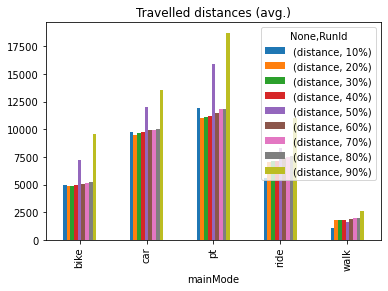

In [9]:
# select the mode and the distance
travelled_distances = data[[distance, mode]]
travelled_distances

 #%%

# group by mode and by run id
average = travelled_distances.groupby([mode, 'RunId']).mean()
# unstack the multi-index into two columns for both run ids and then plot
average.unstack(level='RunId').plot.bar(title='Travelled distances (avg.)')

In [10]:
average.unstack(level='RunId')

distance                                            \
RunId              10%           20%           30%           40%   
mainMode                                                           
bike       5009.569965   4866.439338   4888.308935   4987.657164   
car        9796.567575   9531.407750   9652.345462   9718.868198   
pt        11900.762262  11060.235463  11119.925505  11241.575509   
ride       5575.230964   7055.481103   7124.740867   7166.156335   
walk       1122.087678   1776.461220   1814.039058   1833.361012   

                                                                                
RunId              50%           60%           70%           80%           90%  
mainMode                                                                        
bike       7258.837674   5070.257171   5139.562367   5253.178655   9588.423567  
car       12014.747000   9922.361139   9933.825181  10044.842404  13578.100447  
pt        15861.235680  11491.388770  11794.722826  11857.233492  18722.644316  
ride       8331.686293   7370.964297   7493.001022   7560.140485  10995.384418  
walk       1653.874420   1915.846986   1953.510322   1993.452800   2607.047806

In [11]:
absolute = travelled_distances.groupby([mode, 'RunId']).sum()
absolute.unstack(level='RunId')

distance                                            \
RunId              10%           20%           30%           40%   
mainMode                                                           
bike      8.841390e+07  9.887145e+07  9.961885e+07  1.007008e+08   
car       3.854264e+08  4.836713e+08  4.900785e+08  4.964009e+08   
pt        1.092847e+08  1.460947e+08  1.498521e+08  1.526718e+08   
ride      8.282563e+07  1.045693e+08  1.055744e+08  1.061236e+08   
walk      6.131760e+07  6.512329e+07  6.581334e+07  6.594966e+07   

                                                                                
RunId              50%           60%           70%           80%           90%  
mainMode                                                                        
bike      1.424402e+08  1.036868e+08  1.049139e+08  1.077952e+08  2.133808e+08  
car       5.300786e+08  5.087790e+08  5.125754e+08  5.203831e+08  6.453128e+08  
pt        2.058788e+08  1.624193e+08  1.668481e+08  1.698667e+08  3.282641e+08  
ride      1.227924e+08  1.091345e+08  1.108889e+08  1.118674e+08  1.612583e+08  
walk      7.149368e+07  6.695694e+07  6.743908e+07  6.790498e+07  8.252349e+07

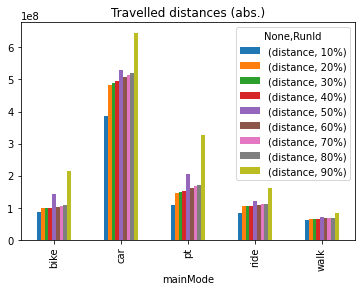

In [12]:
absolute.unstack(level='RunId').plot.bar(title='Travelled distances (abs.)')

In [13]:
distance_sum = travelled_distances.unstack(level='RunId')[distance].sum()

distance_sum


RunId
10%    7.272682e+08
20%    8.983300e+08
30%    9.109372e+08
40%    9.218468e+08
50%    1.072684e+09
60%    9.509765e+08
70%    9.626655e+08
80%    9.778174e+08
90%    1.430740e+09
dtype: float64

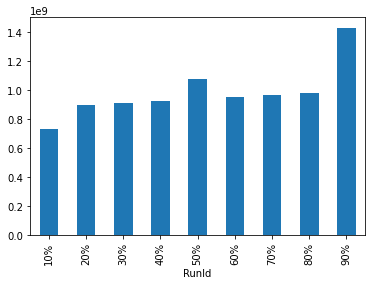

In [14]:
distance_sum.plot.bar()